In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('car+data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print('Rows',data.shape[0])
print('Columns',data.shape[1])

Rows 301
Columns 9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [7]:
data.describe(include='object').T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


<Axes: >

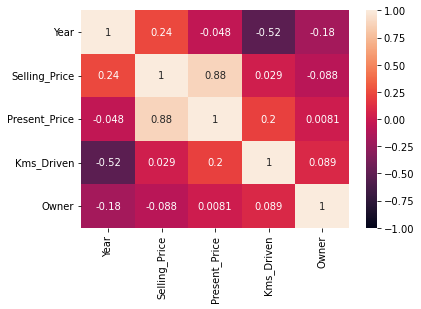

In [8]:
sns.heatmap(data.corr(numeric_only=True),vmax=1,vmin=-1,annot=True)

## Univariate Analysis

In [9]:
num_cols = ['Selling_Price','Present_Price','Kms_Driven']
cat_cols = ['Year','Fuel_Type','Seller_Type','Transmission','Owner']

		UNIVARIATE ANALYSIS (NUMERIC COLUMNS)


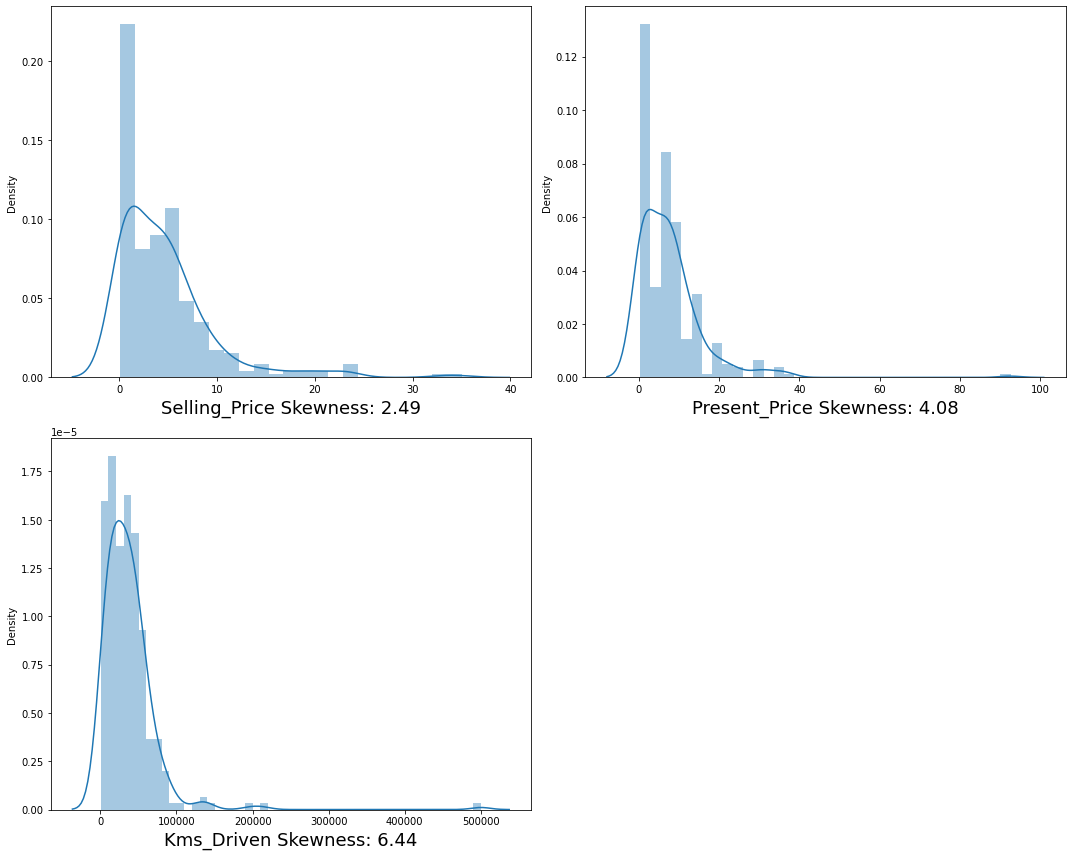

In [10]:
t= 1
plt.figure(figsize=(15,12))
print('\t\tUNIVARIATE ANALYSIS (NUMERIC COLUMNS)')
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s Skewness: %.2f'%(i,data[i].skew()),fontsize=18)
    t+=1
plt.tight_layout()
plt.show()

		UNIVARIATE ANALYSIS (CATEGORICAL COLUMNS)


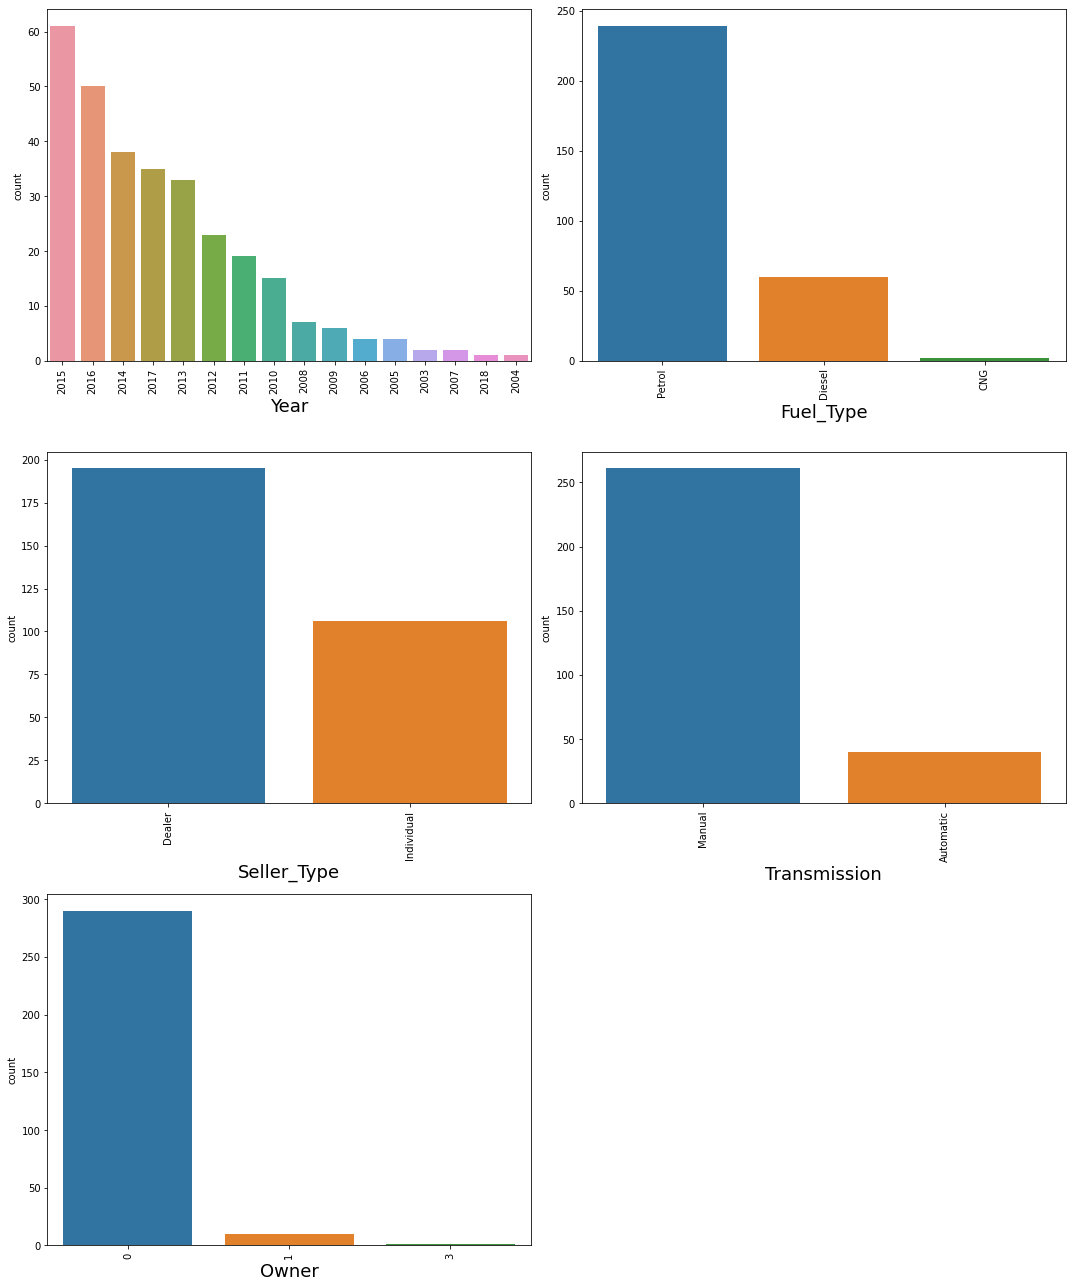

In [11]:
t= 1
plt.figure(figsize=(15,18))
print('\t\tUNIVARIATE ANALYSIS (CATEGORICAL COLUMNS)')
for i in cat_cols:
    plt.subplot(3,2,t)
    ord_c = data[i].value_counts().sort_values(ascending=False).index
    sns.countplot(data=data,x=i,order=ord_c)
    plt.xlabel(i,fontsize=18)
    plt.xticks(rotation='vertical')
    t+=1
plt.tight_layout()
plt.show()

## Bivariate Analysis

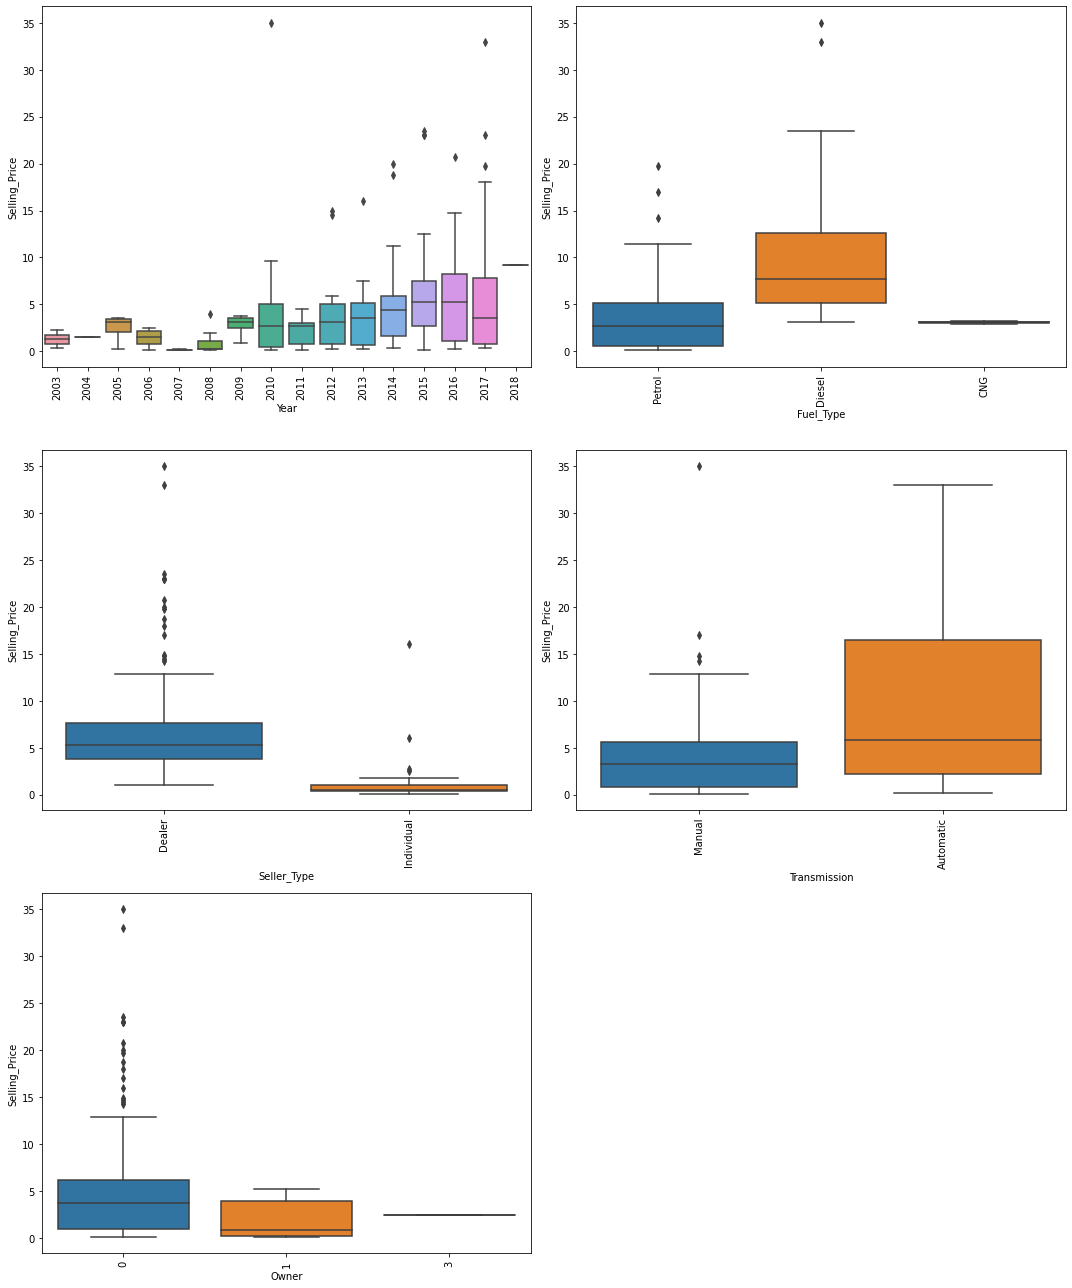

In [12]:
t=1
plt.figure(figsize=(15,18))
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.boxplot(x=data[i],y=data['Selling_Price'])
    plt.xticks(rotation='vertical')
    t+=1
plt.tight_layout()
plt.show()

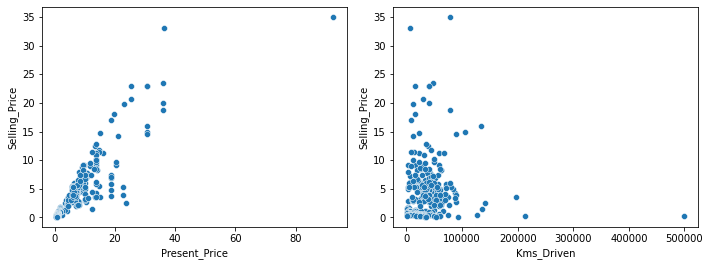

In [13]:
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    if i != 'Selling_Price':
        plt.subplot(2,2,t)
        sns.scatterplot(x=data[i],y=data['Selling_Price'])
        t+=1
plt.tight_layout()
plt.show()

## DATA Preprocessing

## Outlier treatment

		UNIVARIATE ANALYSIS (NUMERIC COLUMNS)


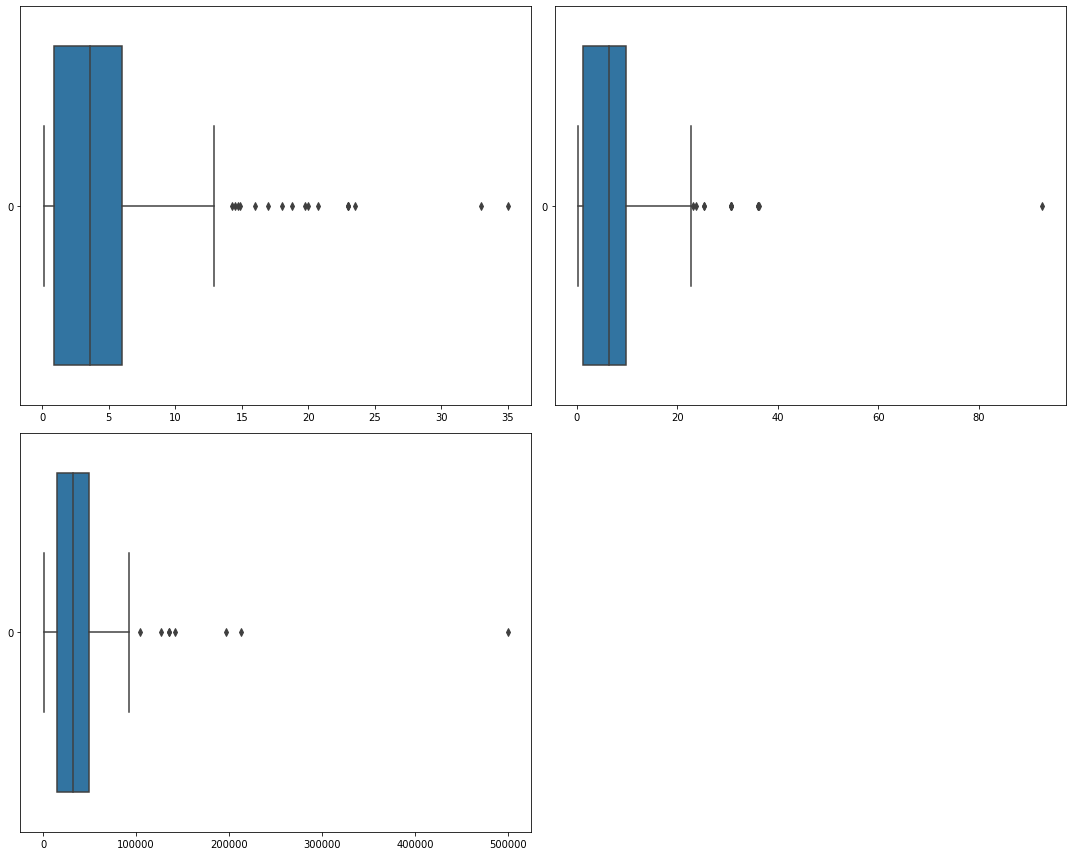

In [14]:
t= 1
plt.figure(figsize=(15,12))
print('\t\tUNIVARIATE ANALYSIS (NUMERIC COLUMNS)')
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [15]:
data[data['Selling_Price']>30]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0


In [16]:
data[data['Present_Price']>40]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [17]:
data[data['Kms_Driven']>400000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [18]:
data.drop(index=[196,86,64],inplace=True)

### Encoding

In [19]:
# Lets perform frequency encoding on car name
map_data = data['Car_Name'].value_counts().to_dict()

In [20]:
data['Car_Name'] = data['Car_Name'].map(map_data)

In [21]:
# Lets try frequency encoding on year data
map_data = data['Year'].value_counts().to_dict()

In [22]:
data['Year'] = data['Year'].map(map_data)

In [23]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,4,38,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,33,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,9,34,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,4,19,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,38,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,26,50,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,10,61,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,26,6,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,26,34,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [24]:
# One hot encoding for other variables

In [25]:
data = pd.get_dummies(data,dtype=int)

In [26]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,4,38,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,6,33,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,9,34,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,4,19,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,5,38,4.60,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,26,50,9.50,11.60,33988,0,0,1,0,1,0,0,1
297,10,61,4.00,5.90,60000,0,0,0,1,1,0,0,1
298,26,6,3.35,11.00,87934,0,0,0,1,1,0,0,1
299,26,34,11.50,12.50,9000,0,0,1,0,1,0,0,1


In [27]:
data.drop(columns=['Fuel_Type_Diesel','Seller_Type_Individual','Transmission_Manual'],inplace=True)

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = data.drop(columns=['Selling_Price'])
y = data['Selling_Price']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=2)

In [31]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(238, 9) (238,) (60, 9) (60,)


### Checking for assumption in Linear model

In [32]:
# Lets check for multicolinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]

In [35]:
pd.DataFrame({'VIF':vif},index=x_train.columns).sort_values(by='VIF',ascending=False)

,VIF
Present_Price,6.209334
Seller_Type_Dealer,5.287216
Year,4.076921
Car_Name,3.819804
Fuel_Type_Petrol,3.565738
Kms_Driven,2.674987
Transmission_Automatic,1.587726
Owner,1.051004
Fuel_Type_CNG,1.038469


#### Fit a base model

In [36]:
import statsmodels.api as sm

In [37]:
x_train_c = sm.add_constant(x_train)
x_test_c = sm.add_constant(x_test)

In [38]:
base_model = sm.OLS(y_train,x_train_c).fit()

In [39]:
print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          2.19e-102
Time:                        13:26:35   Log-Likelihood:                -431.26
No. Observations:                 238   AIC:                             882.5
Df Residuals:                     228   BIC:                             917.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

### Significance of the model

In [40]:
# Ho: The model is insignificant
# Ha: The model is significant

if base_model.f_pvalue > 0.05:
    print('Model is insignificant')
else:
    print('Model is significant')

Model is significant


### Check the significant features

In [41]:
print('Statistically significant columns: ')
for i in base_model.pvalues.to_dict():
    if base_model.pvalues.to_dict()[i]<0.05:
        print(i)

Statistically significant columns: 
const
Year
Present_Price
Kms_Driven
Fuel_Type_Petrol
Seller_Type_Dealer


<Axes: >

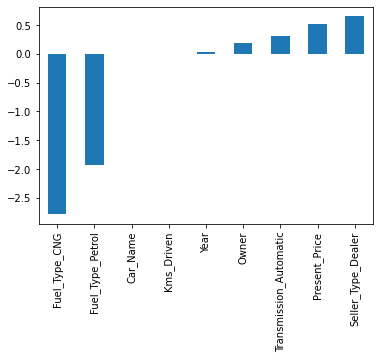

In [42]:
base_model.params[1:].sort_values().plot(kind='bar')

### Normality of residuals

In [43]:
import scipy.stats as stats

<Axes: ylabel='Density'>

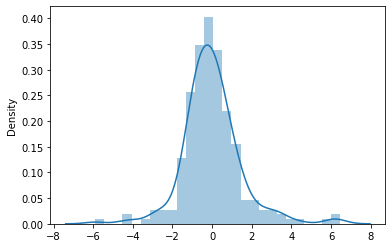

In [44]:
sns.distplot(base_model.resid)

In [45]:
# H0: Residuals is normal
# H1: Residuals are not normal
_,p = stats.shapiro(base_model.resid)
if p>0.05:
    print('Residual is normal')
else:
    print('Residual is not normal')

Residual is not normal


In [46]:
from statsmodels.graphics.gofplots import qqplot

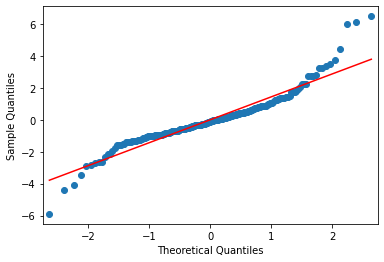

In [47]:
qqplot(base_model.resid,line='r')
plt.show()

### Homoscedasticity

In [48]:
y_pred_train = base_model.predict(x_train_c)

<Axes: xlabel='Selling_Price'>

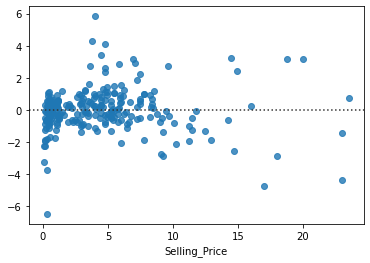

In [49]:
sns.residplot(x=y_train,y=y_pred_train)

In [50]:
# Ho: There is homoscedasticity
# Ha: There is heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

In [51]:
p = het_breuschpagan(base_model.resid,base_model.model.exog)[3]

In [52]:
if p < 0.05:
    print('Homoscedasticity is not present')
else:
    print('Homoscedasticity is present')

Homoscedasticity is not present


### Validate the base model

In [53]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [54]:
def validation(fitted_model,train_x,train_y,test_x,test_y):
    y_pred_test = fitted_model.predict(test_x)
    r2 = r2_score(test_y,y_pred_test)
    print('R2',r2)
    adj_r2 = 1- (((1-r2)*(train_x.shape[0]-1))/(train_x.shape[0] - train_x.shape[1] - 1))
    print('Adjusted R2',adj_r2)
    print('MSE',mean_squared_error(test_y,y_pred_test))
    print('RMSE',mean_squared_error(test_y,y_pred_test)**0.5)
    print('MAPE',mean_absolute_percentage_error(test_y,y_pred_test))    

In [55]:
validation(base_model,x_train_c,y_train,x_test_c,y_test)

R2 0.8608227800498689
Adjusted R2 0.8546916249859865
MSE 3.235911591225923
RMSE 1.7988639724075646
MAPE 0.7499488669105997


### Models from sklearn

In [56]:
def model_validation(model,train_x,train_y,test_x,test_y):
    global m
    m = model
    m.fit(x_train,y_train)
    print('%s'%model)
    print('Train Parameters:')
    validation(m,train_x,train_y,train_x,train_y)
    print('\nTest parametrs:')
    validation(m,train_x,train_y,test_x,test_y)

In [57]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [58]:
model_validation(LinearRegression(),x_train,y_train,x_test,y_test)

LinearRegression()
Train Parameters:
R2 0.8862943529622561
Adjusted R2 0.8818059721581346
MSE 2.1949467662820275
RMSE 1.4815352733843454
MAPE 0.8823743409462174

Test parametrs:
R2 0.8608227800498137
Adjusted R2 0.8553289424202011
MSE 3.2359115912272065
RMSE 1.7988639724079212
MAPE 0.7499488669106318


In [59]:
model_validation(SGDRegressor(),x_train,y_train,x_test,y_test)

SGDRegressor()
Train Parameters:
R2 -5.213253426897802e+32
Adjusted R2 -5.41903974638061e+32
MSE 1.0063540421505767e+34
RMSE 1.0031719903140123e+17
MAPE 7.353028493500158e+16

Test parametrs:
R2 -3.13806624721588e+32
Adjusted R2 -3.2619372832901914e+32
MSE 7.296096981272642e+33
RMSE 8.541719370988866e+16
MAPE 5.254536747288821e+16


In [60]:
# Since the values are not scalled the SGD regressor is not able to converge

In [61]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [62]:
model_validation(Lasso(alpha=0.1),x_train,y_train,x_test,y_test)

Lasso(alpha=0.1)
Train Parameters:
R2 0.8778503344485021
Adjusted R2 0.873028637124101
MSE 2.357948091317693
RMSE 1.5355611649549141
MAPE 0.8982826085320514

Test parametrs:
R2 0.855562762109523
Adjusted R2 0.8498612921927936
MSE 3.358208566473171
RMSE 1.832541559275852
MAPE 0.8116486017227166


In [63]:
m.coef_

array([-5.21992834e-03,  4.00803668e-02,  5.72031340e-01, -2.74174194e-05,
        0.00000000e+00, -0.00000000e+00, -1.04736076e+00,  0.00000000e+00,
        0.00000000e+00])

In [64]:
model_validation(Ridge(alpha=10),x_train,y_train,x_test,y_test)

Ridge(alpha=10)
Train Parameters:
R2 0.8832331872904351
Adjusted R2 0.878623970999268
MSE 2.2540387803328925
RMSE 1.501345656513813
MAPE 0.8790956443786409

Test parametrs:
R2 0.860061044350067
Adjusted R2 0.8545371382059908
MSE 3.253622171889359
RMSE 1.803779967703755
MAPE 0.7485652163156965


In [65]:
m.coef_

array([-1.35435303e-02,  3.82346609e-02,  5.48874075e-01, -2.86814117e-05,
        9.01517514e-02, -2.06364345e-01, -1.36526634e+00,  4.83593179e-01,
        1.26164274e-01])

In [66]:
model_validation(ElasticNet(l1_ratio=0.5,alpha=0.1),x_train,y_train,x_test,y_test)

ElasticNet(alpha=0.1)
Train Parameters:
R2 0.8789383196495422
Adjusted R2 0.8741595691093925
MSE 2.336945883766885
RMSE 1.5287072590155661
MAPE 0.8898674870819926

Test parametrs:
R2 0.8580684851522531
Adjusted R2 0.8524659253556315
MSE 3.2999497634788453
RMSE 1.816576385258502
MAPE 0.788312199720572


### Lets Try Feature Selection

In [67]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [68]:
sfs = SequentialFeatureSelector(estimator=Ridge(alpha=10),
                                k_features='best',
                               cv=3,
                               scoring='r2',forward=False,
                               verbose=0)

In [69]:
sfs.fit(x_train,y_train)

SequentialFeatureSelector(cv=3, estimator=Ridge(alpha=10), forward=False,
                          k_features=(1, 9), scoring='r2')

In [70]:
k_features = list(sfs.k_feature_names_)

In [71]:
k_features

['Year',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type_CNG',
 'Fuel_Type_Petrol',
 'Seller_Type_Dealer']

In [72]:
lm = Ridge(alpha=10)

In [73]:
lm.fit(x_train[k_features],y_train)

Ridge(alpha=10)

In [75]:
validation(lm,x_train[k_features],y_train,x_train[k_features],y_train) # train parameters

R2 0.882590343756018
Adjusted R2 0.8795407422951353
MSE 2.2664480790252077
RMSE 1.505472709492008
MAPE 0.8781469484473332


In [74]:
validation(lm,x_train[k_features],y_train,x_test[k_features],y_test) # test parameters

R2 0.8621298498565182
Adjusted R2 0.8585488069956485
MSE 3.2055218310382037
RMSE 1.790397115457407
MAPE 0.7430704652712873


### Lets fine tune the final model

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
grid = {'alpha':range(1,16)}

In [78]:
gscv = GridSearchCV(estimator=Ridge(),
                   param_grid=grid,
                   cv=3,verbose=3)

In [79]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END ...........................alpha=1;, score=0.854 total time=   0.0s
[CV 2/3] END ...........................alpha=1;, score=0.842 total time=   0.0s
[CV 3/3] END ...........................alpha=1;, score=0.838 total time=   0.0s
[CV 1/3] END ...........................alpha=2;, score=0.855 total time=   0.0s
[CV 2/3] END ...........................alpha=2;, score=0.842 total time=   0.0s
[CV 3/3] END ...........................alpha=2;, score=0.838 total time=   0.0s
[CV 1/3] END ...........................alpha=3;, score=0.856 total time=   0.0s
[CV 2/3] END ...........................alpha=3;, score=0.842 total time=   0.0s
[CV 3/3] END ...........................alpha=3;, score=0.839 total time=   0.0s
[CV 1/3] END ...........................alpha=4;, score=0.856 total time=   0.0s
[CV 2/3] END ...........................alpha=4;, score=0.843 total time=   0.0s
[CV 3/3] END ...........................alpha=4;

GridSearchCV(cv=3, estimator=Ridge(), param_grid={'alpha': range(1, 16)},
             verbose=3)

In [80]:
gscv.best_params_

{'alpha': 6}

In [81]:
final_model = Ridge(**gscv.best_params_)

In [82]:
final_model.fit(x_train[k_features],y_train)

Ridge(alpha=6)

In [83]:
print('Train Parameter')
validation(final_model,x_train[k_features],y_train,x_train[k_features],y_train)

Train Parameter
R2 0.8835736168681649
Adjusted R2 0.8805495549686367
MSE 2.247467208733314
RMSE 1.499155498516853
MAPE 0.87809757227458


In [84]:
print('Test Parameter')
validation(final_model,x_train[k_features],y_train,x_test[k_features],y_test)

Test Parameter
R2 0.8623092005130436
Adjusted R2 0.858732816110785
MSE 3.2013518751463383
RMSE 1.7892322026909582
MAPE 0.7393066834965083
